# Finding best model and hyper parameter tunning using Boosting GridSearchCV
 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [2]:
df= pd.read_csv(r'C:\Users\shhimel\Desktop\credit card taiwan svm algorithm.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

### EDA
**Data Cleaning**

In [4]:
df.isna().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29998.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485499,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760367,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.218203,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107295,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [7]:
df.isna().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           2
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
null_value = df.AGE.mean()


In [9]:
df.AGE = df.AGE.fillna(null_value)


In [10]:
df.isna().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
df.drop(['ID'],axis=1)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24.000000,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26.000000,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,35.485499,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,35.485499,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57.000000,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39.000000,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43.000000,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37.000000,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41.000000,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [12]:
X = df.drop(['default.payment.next.month'],axis=1)


In [13]:
y = df['default.payment.next.month']

**We will check corelation between different parameter**

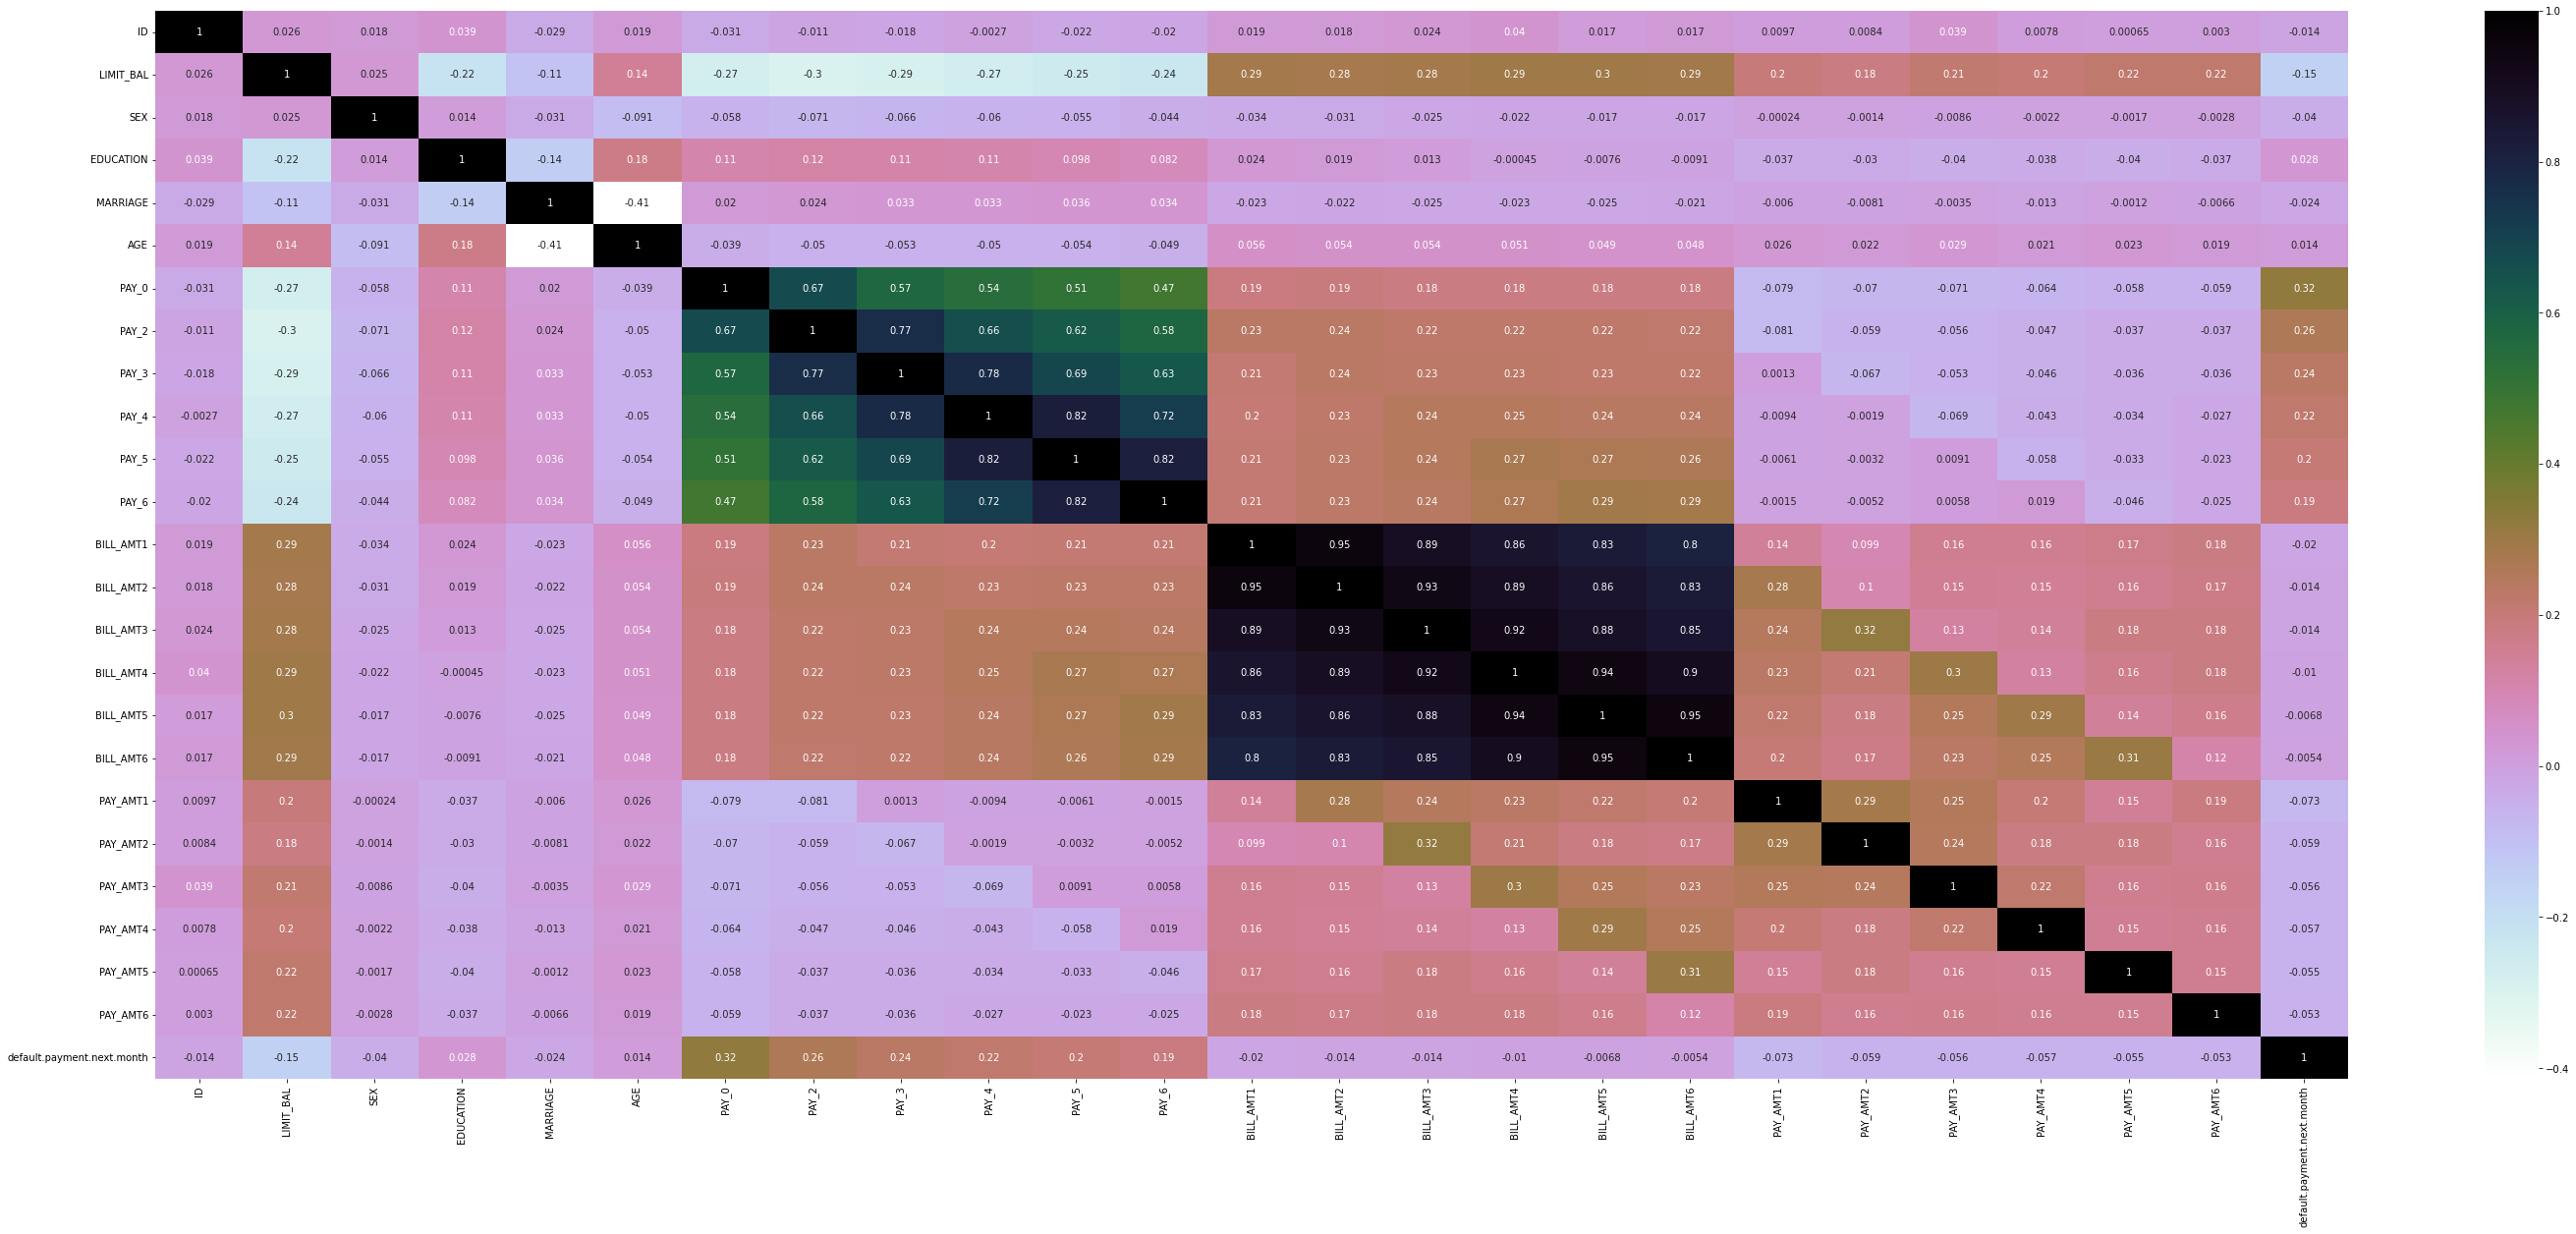

In [14]:
plt.figure(figsize=(50,20))
sns.heatmap(df.corr(), annot=True, cmap = 'cubehelix_r')
plt.show()

## Model Building

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from sklearn import metrics
%matplotlib inline
from sklearn.metrics import confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [17]:
print(X_train.shape)
print(X_test.shape)



(24000, 24)
(6000, 24)


## Base Model

In [18]:
dclf = DecisionTreeClassifier(max_depth=2, random_state= 100)


In [19]:
dclf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=100)

In [20]:
dclf.score(X_test, y_test)


0.817

In [21]:
y_predicted = dclf.predict(X_test)
score = metrics.accuracy_score(y_test, y_predicted)
score

0.817

In [22]:
confusion_matrix(y_test, y_predicted)

array([[4462,  163],
       [ 935,  440]], dtype=int64)

## Ensemble Methods

**Noraml Model without GridSearchCV**

In [23]:
abc = AdaBoostClassifier(n_estimators=20, learning_rate=.001, base_estimator=dclf, random_state=100)

In [24]:
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=100),
                   learning_rate=0.001, n_estimators=20, random_state=100)

In [25]:
abc.score(X_test, y_test)


0.817

In [26]:
import numpy as np

## HyperTuning GridSearchCV

In [27]:
model_params = {
    'adaBoost': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [20,50],
            'learning_rate': [.001,0.01]
        }  
    },
    'GradBoost': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'n_estimators': [100],
            'max_depth': [2],
            'learning_rate': [1],
            'criterion': ['mse']
        }
        
    }
}

In [28]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,adaBoost,0.820500,"{'learning_rate': 0.001, 'n_estimators': 20}"
1,GradBoost,0.814208,"{'criterion': 'mse', 'learning_rate': 1, 'max_..."


## XGBoosting Algo

In [29]:
!pip3 install xgboost

In [30]:
import xgboost as xgb

In [31]:
params= {
    'n_estimators': 100,
    'max_depth': 2,
    'learning_rate': .1,
    'sbsample': 0.7
}
xgb = xgb.XGBClassifier(params=params)
xgb.fit(X_train, y_train)

[12:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100,
                      'sbsample': 0.7},
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [32]:
xgb.score(X_test, y_test)

0.8163333333333334

In [33]:
y_xgb= xgb.predict(X_test)

In [34]:
confusion_matrix(y_test,y_xgb)

array([[4380,  245],
       [ 857,  518]], dtype=int64)

# Features Importances Using XGBoost

In [35]:
from xgboost import plot_importance

In [43]:
importance= dict(zip(X_train.columns, xgb.feature_importances_))
importance

{'ID': 0.016597802,
 'LIMIT_BAL': 0.022339629,
 'SEX': 0.014414028,
 'EDUCATION': 0.020992396,
 'MARRIAGE': 0.017082216,
 'AGE': 0.016669214,
 'PAY_0': 0.41699833,
 'PAY_2': 0.10461532,
 'PAY_3': 0.04459908,
 'PAY_4': 0.03322063,
 'PAY_5': 0.034112856,
 'PAY_6': 0.03272804,
 'BILL_AMT1': 0.022365622,
 'BILL_AMT2': 0.019661082,
 'BILL_AMT3': 0.017335035,
 'BILL_AMT4': 0.018159835,
 'BILL_AMT5': 0.016741384,
 'BILL_AMT6': 0.018158965,
 'PAY_AMT1': 0.018191855,
 'PAY_AMT2': 0.021522475,
 'PAY_AMT3': 0.021623464,
 'PAY_AMT4': 0.017881868,
 'PAY_AMT5': 0.017166438,
 'PAY_AMT6': 0.016822465}